# Forcasting with LSTM on NGA time serie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../omar/Data/test_st.csv')

In [3]:
df

,value_created_at,measure_id,point_id,NGA,NGV,K,VCC_g,VC_g
0,2023-06-24 15:05:48,12870679,232710,0.10832,2.77359,1.891347,0.49635,0.41004
1,2023-06-24 15:22:51,12870678,232710,0.10783,3.13995,1.896530,0.48180,0.42522
2,2023-06-24 15:50:00,12870677,232710,0.10815,2.66659,1.887733,0.48101,0.40710
3,2023-06-24 15:55:00,12870676,232710,0.10708,2.65100,1.901864,0.48632,0.40771
4,2023-06-24 16:00:00,12870675,232710,0.10750,2.55173,1.898690,0.49191,0.42289
...,...,...,...,...,...,...,...,...
5699,2024-03-01 06:40:00,21130040,232710,0.54927,4.42352,4.068230,9.18245,4.87565
5700,2024-03-01 07:40:00,21132241,232710,0.52915,4.16160,4.259252,8.98788,5.14323
5701,2024-03-01 08:40:00,21134403,232710,0.55540,4.46625,4.059374,8.60813,4.33526
5702,2024-03-01 09:40:00,21136658,232710,0.50074,4.34932,4.110944,7.49714,3.75781


In [4]:
df.index = pd.to_datetime(df['value_created_at'])

In [5]:
df

,value_created_at,measure_id,point_id,NGA,NGV,K,VCC_g,VC_g
value_created_at,,,,,,,,
2023-06-24 15:05:48,2023-06-24 15:05:48,12870679,232710,0.10832,2.77359,1.891347,0.49635,0.41004
2023-06-24 15:22:51,2023-06-24 15:22:51,12870678,232710,0.10783,3.13995,1.896530,0.48180,0.42522
2023-06-24 15:50:00,2023-06-24 15:50:00,12870677,232710,0.10815,2.66659,1.887733,0.48101,0.40710
2023-06-24 15:55:00,2023-06-24 15:55:00,12870676,232710,0.10708,2.65100,1.901864,0.48632,0.40771
2023-06-24 16:00:00,2023-06-24 16:00:00,12870675,232710,0.10750,2.55173,1.898690,0.49191,0.42289
...,...,...,...,...,...,...,...,...
2024-03-01 06:40:00,2024-03-01 06:40:00,21130040,232710,0.54927,4.42352,4.068230,9.18245,4.87565
2024-03-01 07:40:00,2024-03-01 07:40:00,21132241,232710,0.52915,4.16160,4.259252,8.98788,5.14323
2024-03-01 08:40:00,2024-03-01 08:40:00,21134403,232710,0.55540,4.46625,4.059374,8.60813,4.33526


In [6]:
nga = df['NGA']

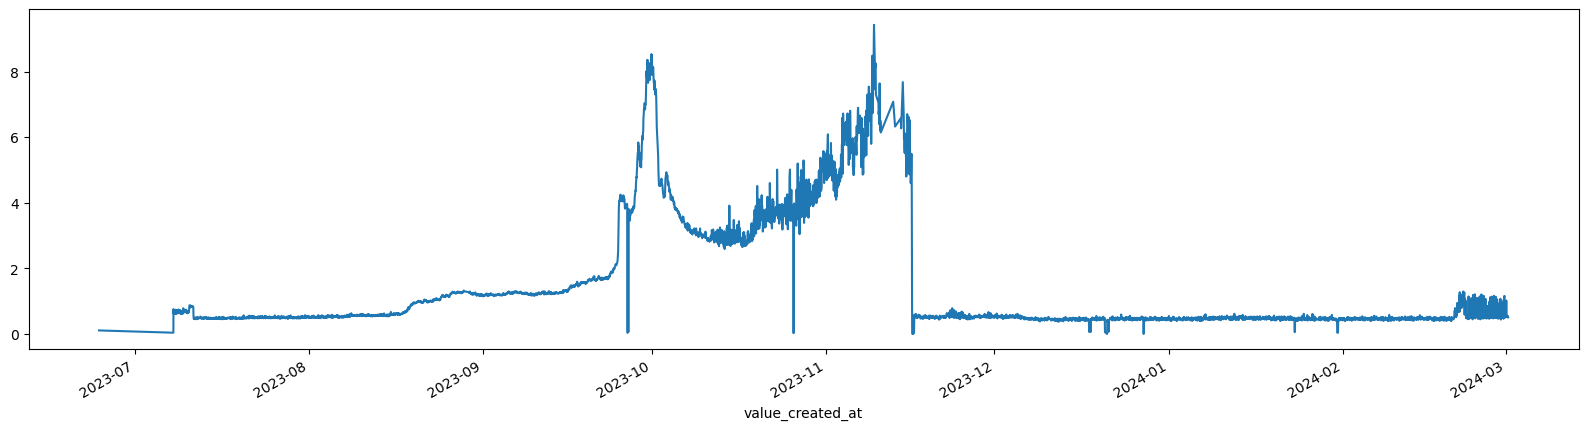

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))
nga.plot();

In [8]:
nga.index

DatetimeIndex(['2023-06-24 15:05:48', '2023-06-24 15:22:51',
               '2023-06-24 15:50:00', '2023-06-24 15:55:00',
               '2023-06-24 16:00:00', '2023-06-24 16:05:00',
               '2023-06-24 16:10:00', '2023-06-24 16:20:00',
               '2023-06-24 16:30:00', '2023-07-07 20:37:52',
               ...
               '2024-03-01 01:40:00', '2024-03-01 02:40:00',
               '2024-03-01 03:40:00', '2024-03-01 04:40:00',
               '2024-03-01 05:40:00', '2024-03-01 06:40:00',
               '2024-03-01 07:40:00', '2024-03-01 08:40:00',
               '2024-03-01 09:40:00', '2024-03-01 10:40:00'],
              dtype='datetime64[ns]', name='value_created_at', length=5704, freq=None)

In [9]:
diff = np.diff(nga.index)/1e9
diff = diff.astype(np.int32)
diff

array([1023, 1629,  300, ..., 3600, 3600, 3600])

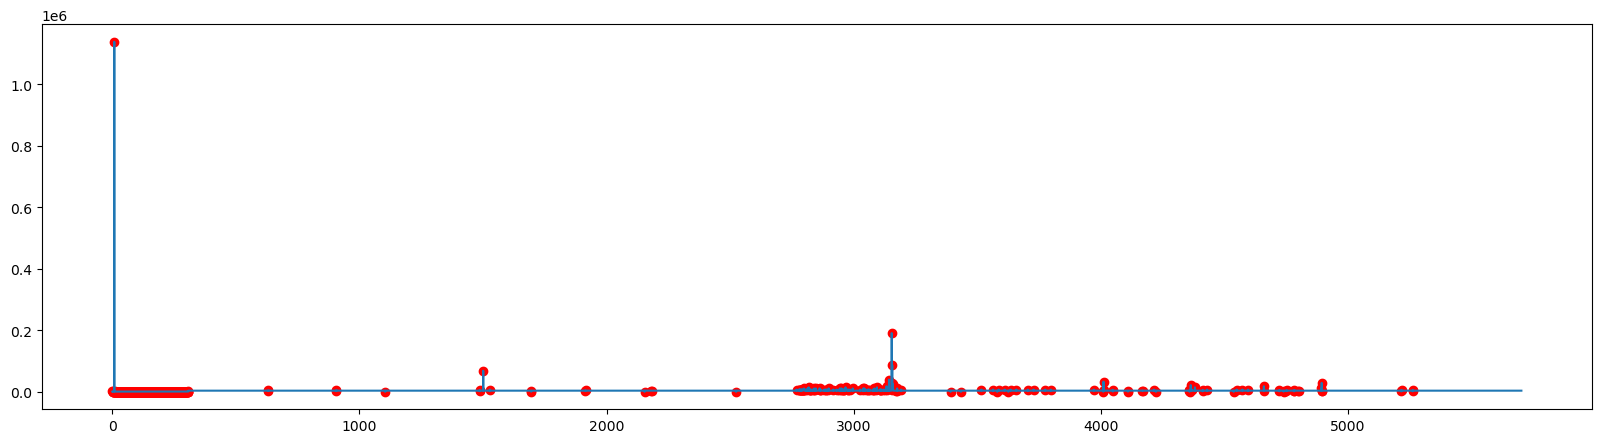

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(diff)
plt.scatter(x=np.where(diff!=3600), y=diff[diff!=3600], color='red')

<b>Remarks:</b>
- From the above plot we can see that not all points are 1-hour separated
- And inconsistencies are occuring everywhere
- Thus, we cannot have sufficient interval with 1-hour separated points
- A possible solution is make an interpolation with available points, then sample every 1 hour from the interpolation 

In [11]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [12]:
WINDOW_SIZE = 100
X, y = df_to_X_y(nga, WINDOW_SIZE)
X.shape, y.shape

((5604, 100, 1), (5604,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2016, 100, 1), (2016,), (505, 100, 1), (505,), (3083, 100, 1), (3083,))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(50, 'relu'))
model1.add(Dense(50, 'linear'))
model1.add(Dense(50, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,297 (98.82 KB)

 Trainable params: 25,297 (98.82 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
cp1 = ModelCheckpoint('model_nga.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [16]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.2165 - root_mean_squared_error: 0.4305 - val_loss: 3.9315 - val_root_mean_squared_error: 1.9828
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 3.5120 - val_root_mean_squared_error: 1.8740
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 9.9723e-04 - root_mean_squared_error: 0.0315 - val_loss: 3.3479 - val_root_mean_squared_error: 1.8297
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 9.7864e-04 - root_mean_squared_error: 0.0310 - val_loss: 3.1960 - val_root_mean_squared_error: 1.7877
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 9.5850e-04 - root_mean_squared_error: 0.0309 - val_loss: 3.0750 - val_root_mean_squared_error: 1.7536
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 8.0411e-04 - root_mean_squared_error: 0.0283 - val_loss: 3.0280 - val_root_mean_squared_error: 1.7401
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━

In [17]:
from tensorflow.keras.models import load_model
model1 = load_model('model_nga.keras')

In [18]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


,Train Predictions,Actuals
0,0.674123,0.66255
1,0.674713,0.70162
2,0.694921,0.68345
3,0.696272,0.69938
4,0.704897,0.65742
...,...,...
2011,1.893582,1.90912
2012,1.922942,1.90835
2013,1.936110,1.90278
2014,1.938804,1.88086


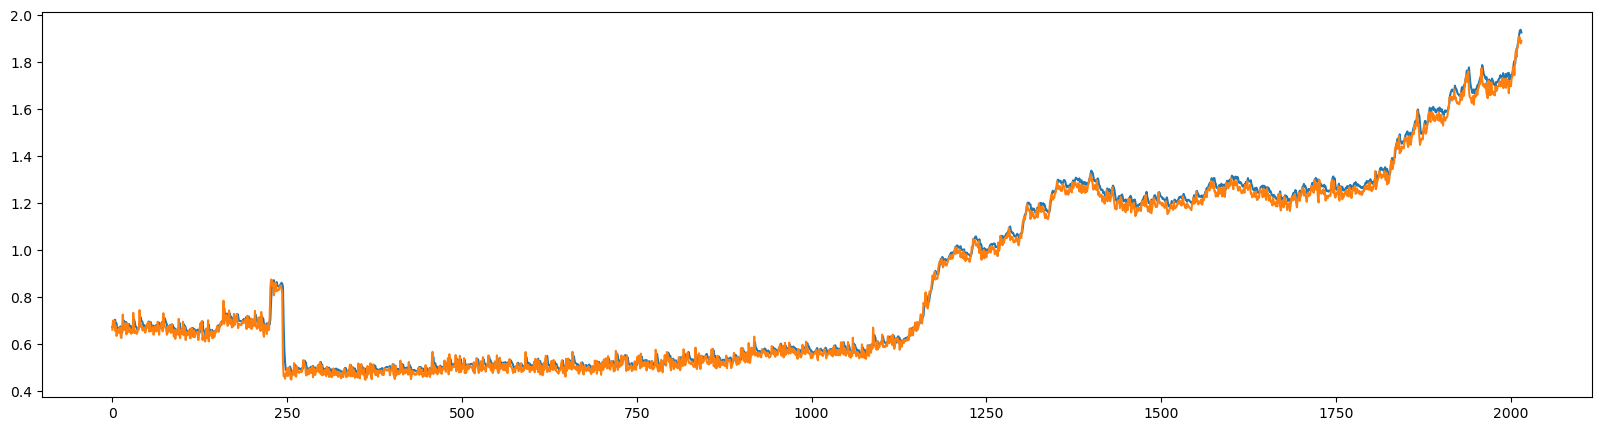

In [19]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [20]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,Val Predictions,Actuals
0,1.927060,1.87729
1,1.919325,1.89843
2,1.928268,1.87607
3,1.919602,1.90342
4,1.931631,1.97461
...,...,...
500,2.852321,2.77613
501,2.823012,2.75995
502,2.801806,3.91634
503,3.391197,3.06759


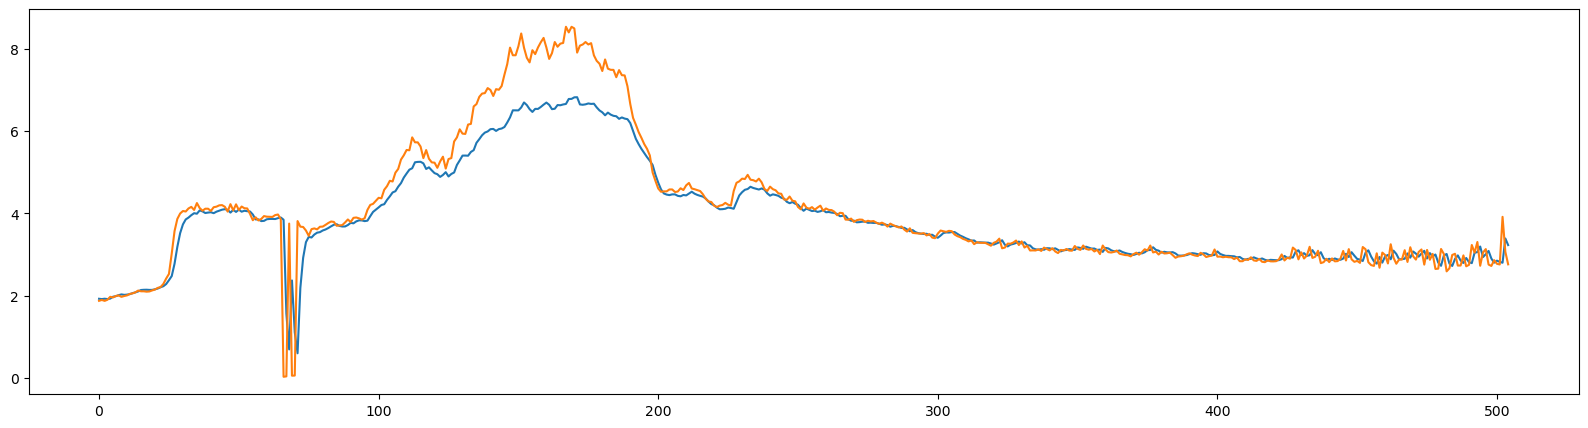

In [21]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])

In [22]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


,Test Predictions,Actuals
0,2.960813,3.07471
1,3.031395,2.70066
2,2.841137,2.68289
3,2.753742,2.72608
4,2.749609,3.18716
...,...,...
3078,0.579665,0.54927
3079,0.569527,0.52915
3080,0.554810,0.55540
3081,0.560580,0.50074


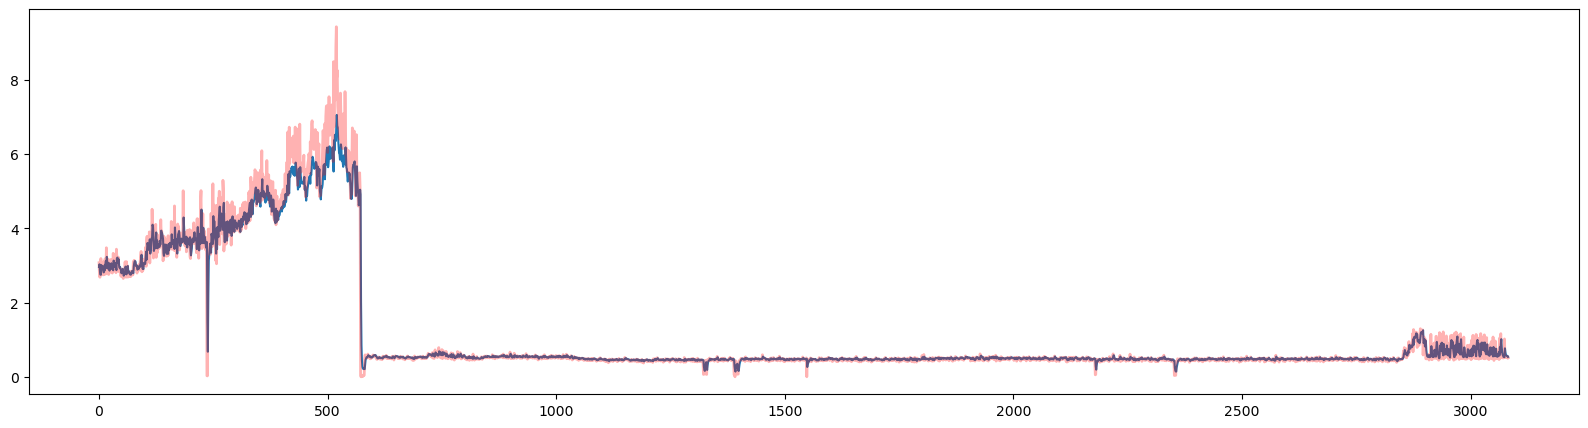

In [23]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'], linewidth=2, alpha=0.3, color='red')

In [ ]:
from sklearn.metrics import ri